In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [44]:
df = pd.read_csv('datasets/weather_data_extended.csv')     #load dataset

In [45]:
df.head()    #view first lines of the data

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


In [46]:
df.describe()    #descriptive analysis

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,800.00000,800.000000,798.000000,798.000000,800.000000,798.000000,800.000000,800.000000
mean,16.53750,16.312500,73.379699,16.165664,43.750000,1013.017544,1.750000,10.750000
std,5.58223,7.397601,16.566658,10.333199,34.820297,7.615259,1.090406,1.985555
min,8.30000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,13.75000,12.375000,65.500000,6.275000,0.000000,1012.000000,1.000000,10.000000
50%,15.50000,15.900000,74.000000,9.000000,62.500000,1013.000000,1.000000,10.000000
75%,20.25000,20.625000,85.750000,24.100000,75.000000,1019.250000,2.250000,10.000000
max,25.00000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


In [47]:
df.info()   #check data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


In [48]:
df.isnull().sum()    #check the null values

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

3 main techniques to deal with null values:
- delete the entire row
- imputation: - median(replace all null values with the median of that particular column) - when column has continuos values

              - mode: (data in column is categorical) - most common value

In [49]:
df = df.dropna() # drop non-values
df.isnull().sum() 

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        0
Wind Speed (kph)    0
Cloud Cover (%)     0
Pressure (mb)       0
UV Index            0
Visibility (km)     0
dtype: int64

In [50]:
df.info() 
#we notice that Location column is an object(string) and not an integer

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          794 non-null    object 
 1   Temperature (°C)  794 non-null    float64
 2   Feels Like (°C)   794 non-null    float64
 3   Humidity (%)      794 non-null    float64
 4   Wind Speed (kph)  794 non-null    float64
 5   Cloud Cover (%)   794 non-null    int64  
 6   Pressure (mb)     794 non-null    float64
 7   UV Index          794 non-null    int64  
 8   Visibility (km)   794 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 62.0+ KB


In [51]:
df['Location_index'] = df['Location'].astype('category').cat.codes #convert data to a categorical type, and return the numerical codes representing 
                                                                                                    #each category
df

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_index
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
...,...,...,...,...,...,...,...,...,...,...
795,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
796,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
797,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
798,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1


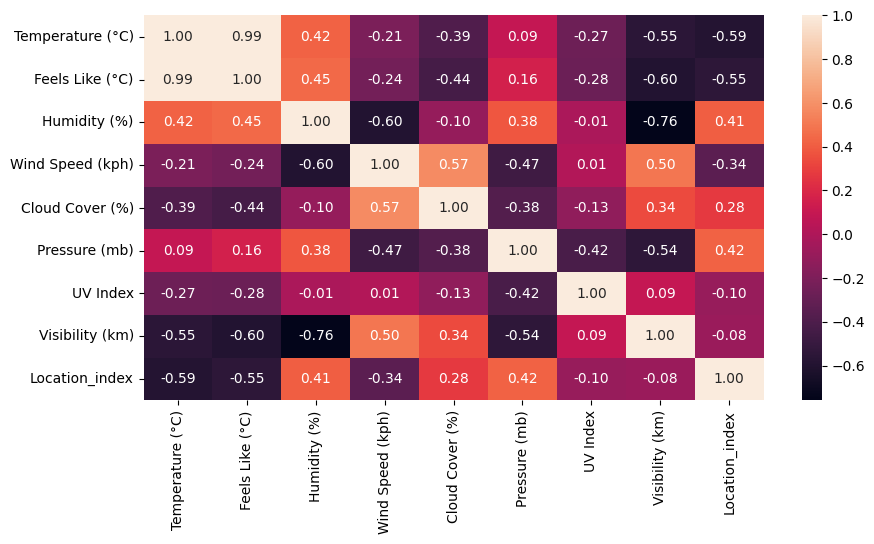

In [52]:
#correlation

numericdf = df.drop('Location', axis = 1)               #drop Location column as we now have the Location_index column
corr = numericdf.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()            

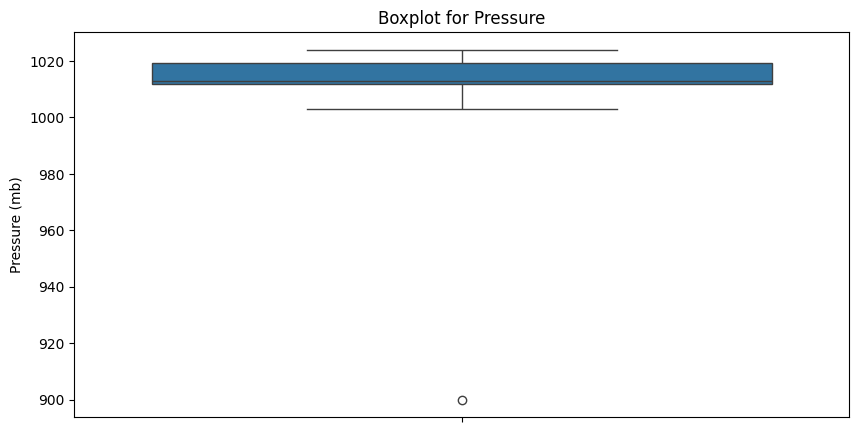

In [53]:
#outliers using boxplot

plt.figure(figsize = (10, 5))
sns.boxplot(data = df['Pressure (mb)'])
plt.title('Boxplot for Pressure')
plt.show()

In [54]:
scaled_numericdf = RobustScaler().fit_transform(numericdf)
scaled_numericdf

array([[-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       [-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       [-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       ...,
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895],
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895],
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895]], shape=(794, 9))

So far we have done:
- Loaded dataset
- Descriptive analysis
- Exploratory data analysis
- Handled outliers
- Scaled the data

In [55]:
#create Linear regression model

model = LinearRegression()

In [56]:
#create feature and label

X = numericdf.drop('Temperature (°C)', axis = 1)             #feature
Y = numericdf['Temperature (°C)']             #target variable

In [ ]:
#scaling the feature and label
Xscaled = RobustScaler().fit_transform(X)


In [58]:
#Train test split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xscaled, Y, test_size = 0.3, random_state = 10)


In [59]:
#train our Linear regression model

model = model.fit(Xtrain, Ytrain)

In [60]:
#make predictions and evaluate our model

ypred = model.predict(Xtest)

#r2: higher is better
r2 = r2_score(Ytest, ypred)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 1.00


In [61]:
#mse (mean square error): error in your model's fit (lower is better)

mse = mean_squared_error(Ytest, ypred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.00
